# Lifestyle and Health Risk Prediction
Dataset: [Lifestyle and Health Dataset](https://www.kaggle.com/datasets/miadul/lifestyle-and-health-risk-prediction)

This synthetic health dataset simulates real-world lifestyle and wellness data for individuals. It is designed to help data scientists, machine learning engineers and students build and test health risk prediction models safely - without using sensitive medical data. The dataset includes such as age, weight, height, exercise habits, sleep hours, sugar intake, smoking, alcohol consumption, marital status, and profession, aling with a synthetic health_risk label generated using a heuristic rule-based algorithm that mimics realistic risk behaviour patterns.

|        Feature        |       Data Type       |        Descriptions        |
|-----------------------|-----------------------|----------------------------|
|        age            |          Int          | Age of the person (years)  |
|       weight          |          Int          | Body weight in kilograms   |
|       height          |          Int          | Height in centimeters      |
|      exercise         |         String        |Exercise frequency level(none, low, medium, high) |
|       sleep           |         Float         |Average hours of sleep per night |
|      sugar_intake     |         String        | Level of sugar consumption (low, medium, high) |
|      smoking          |         String        | Smoking habit (yes,no)     |
|      alcohol          |         String        | Alcohol consumption habit (yes,no) |
|      married          |         String        | Marital Status (yes, no)   |
|     profession        |         String        |Type of work or profession  |
|       bmi             |         Float         | Body Mass Index calculated as weight / (height²) |
|    health_risk        |         String        | Health risk (low, high)    |

Purpose:
This project focuses on exploring synthetic data to examine the relationship between features and health risks. Additionally, it involves building a machine learning model to make predictions and then comparing it with other algorithms.

# Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore', category=FutureWarning)

## Import Dataset

In [2]:
Health_df=pd.read_csv('/kaggle/input/lifestyle-and-health-risk-prediction/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')
Health_df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


# EDA (Exploratory Data Analysis)

## Data Understanding

In [3]:
Health_df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [4]:
Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [5]:
Health_df.duplicated().sum()

0

In [6]:
Health_df.isna().sum()

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [7]:
row, col=Health_df.shape
print("Number of Row in Dataframe:",row)
print("Number of Column in Dataframe:",col)

Number of Row in Dataframe: 5000
Number of Column in Dataframe: 12


## Visualization

### Visualization of Individuals by Exercise Type

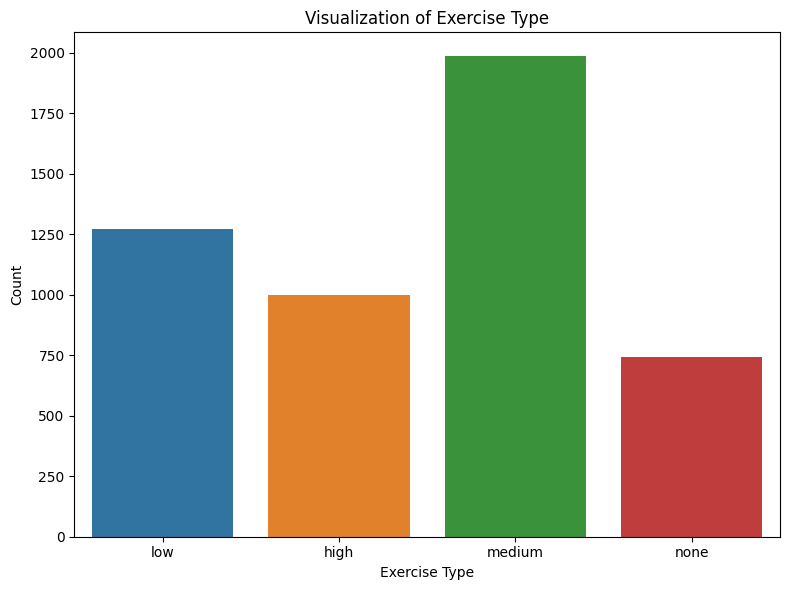

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df, x='exercise')
plt.xlabel('Exercise Type')
plt.ylabel('Count')
plt.title('Visualization of Exercise Type')
plt.tight_layout()
plt.show()

### Visualization of Individuals by Sugar Level

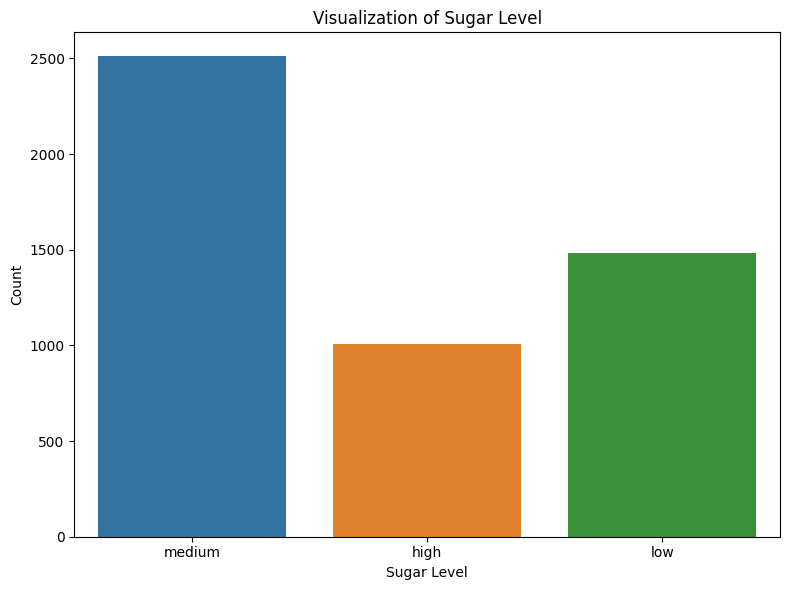

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df, x='sugar_intake')
plt.title('Visualization of Sugar Level')
plt.xlabel('Sugar Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Visualization of Individuals by Smoking Status

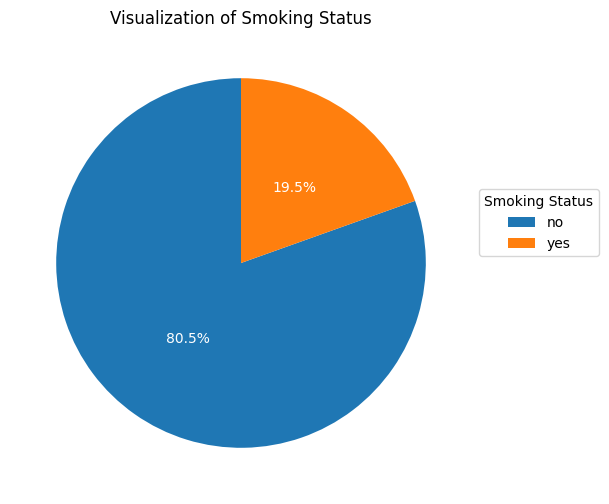

In [10]:
count_smoking=Health_df['smoking'].value_counts()
plt.figure(figsize=(6,6))
wedges,texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Smoking Status')
plt.legend(wedges, count_smoking.index, title='Smoking Status', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Individuals by Drinking Alcohol Status

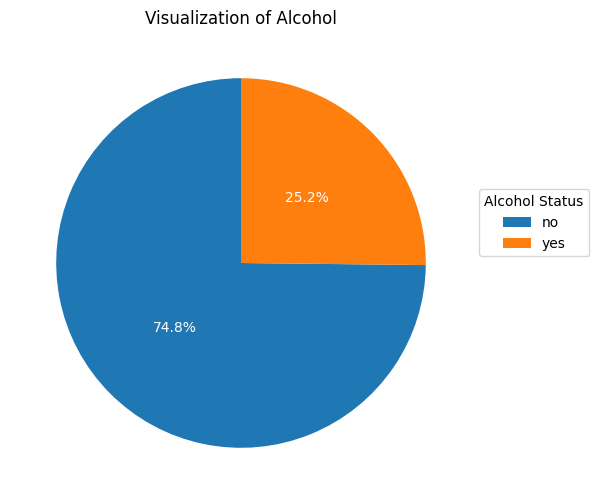

In [11]:
count_alcohol=Health_df['alcohol'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_alcohol.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Alcohol')
plt.legend(wedges, count_alcohol.index, title='Alcohol Status', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Individuals by Married Status

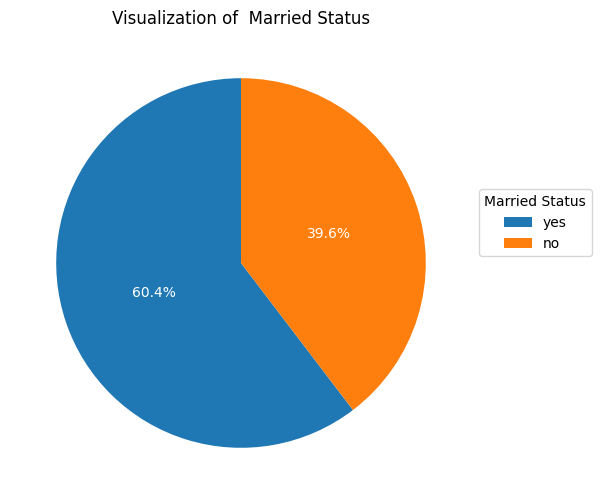

In [12]:
count_married=Health_df['married'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_married.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of  Married Status')
plt.legend(wedges, count_married.index, title='Married Status', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Individuals by Profession

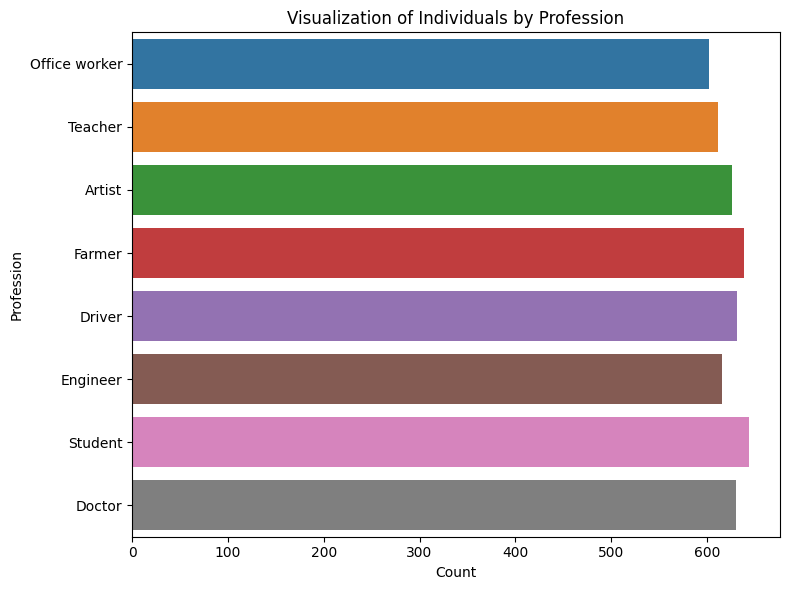

In [13]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=Health_df, y='profession')
plt.title('Visualization of Individuals by Profession')
plt.xlabel('Count')
plt.ylabel('Profession')
ax.set_yticklabels([
    label.get_text().replace('_',' ').capitalize() for label in ax.get_yticklabels()
])
plt.tight_layout()
plt.show()

### Visualization of Individuals by Health Risk Status

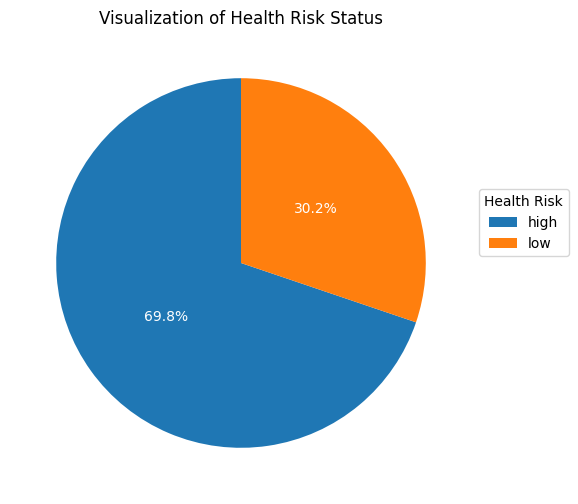

In [14]:
count_health=Health_df['health_risk'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_health.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Health Risk Status')
plt.legend(wedges, count_health.index, title='Health Risk', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Checking Outliers

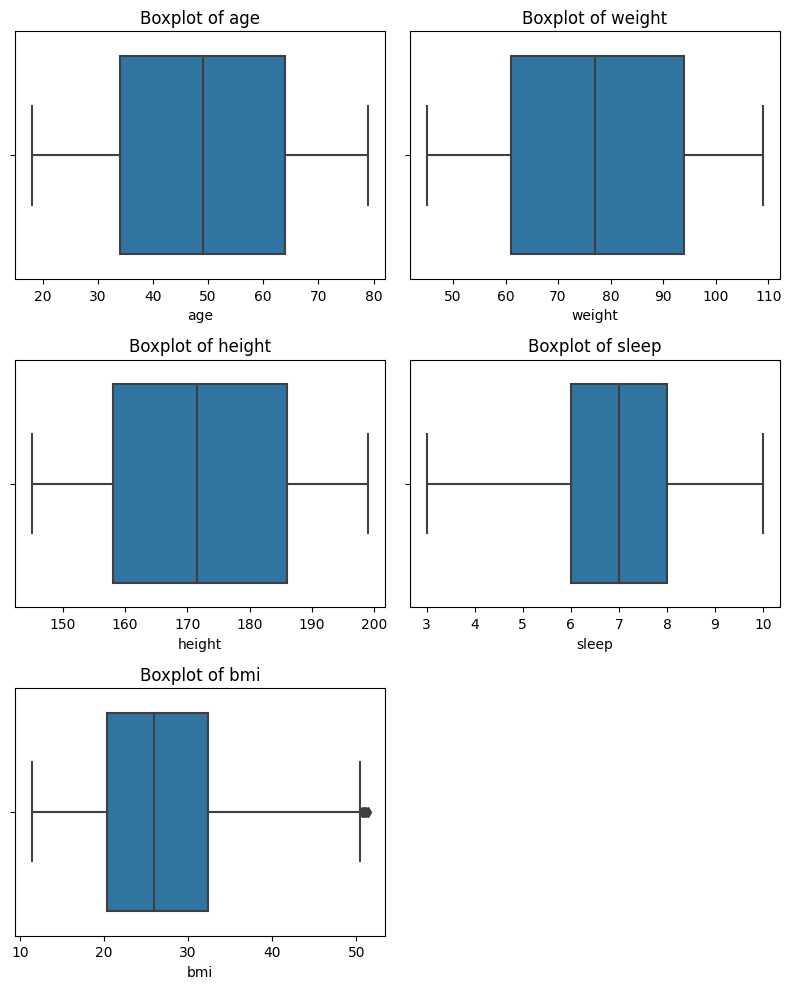

In [15]:
num_cols=['age','weight','height','sleep','bmi']
fig, axes=plt.subplots(3,2,figsize=(8,10))
axes=axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=Health_df,x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Visualization of Numerical Feature Distribution

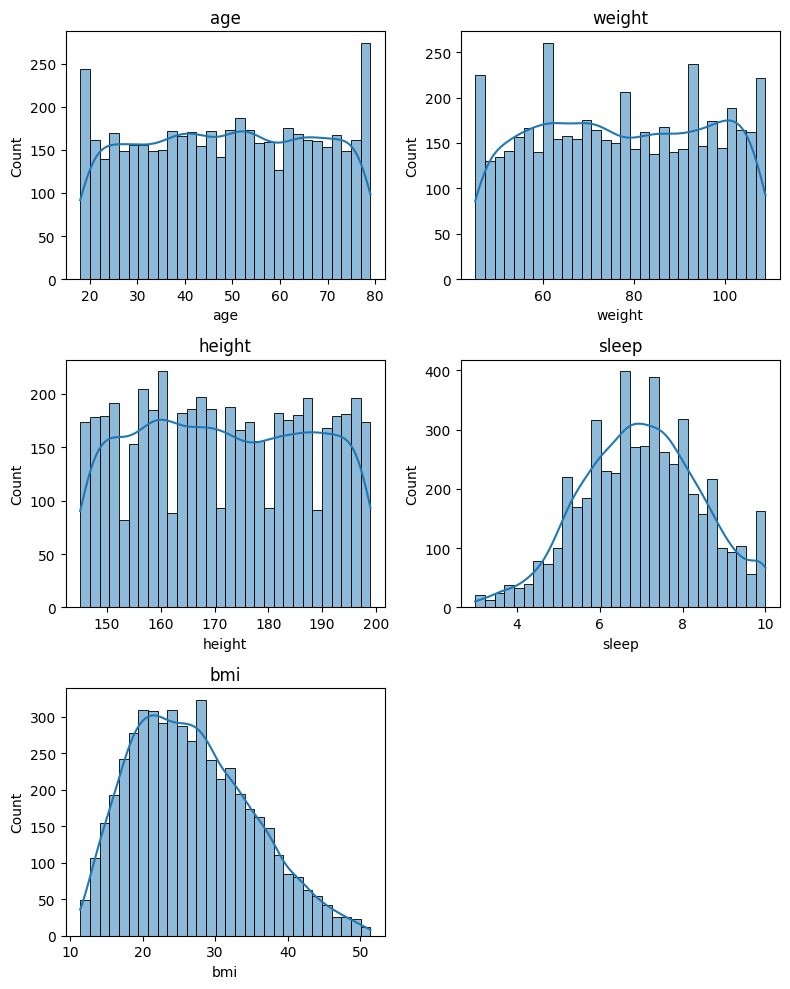

In [16]:
fig, axes=plt.subplots(3,2, figsize=(8,10))
axes=axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(Health_df[col],bins=30, kde=True, edgecolor='black',ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_title(col)
    plt.ylabel('Count')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Visualization of Individuals by Exercise Level and Sugar Level

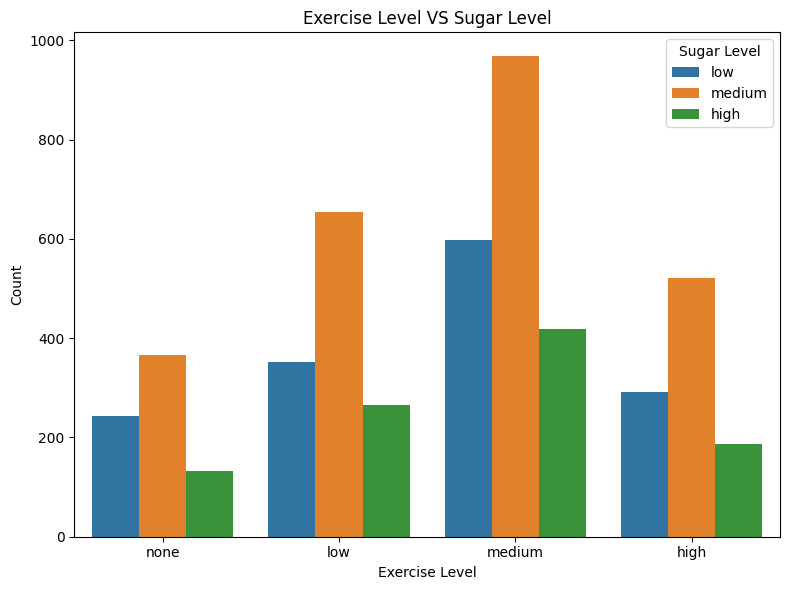

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df,
              x='exercise',
              hue='sugar_intake',
             order=['none','low','medium','high'],
             hue_order=['low','medium','high'])
plt.title('Exercise Level VS Sugar Level')
plt.xlabel('Exercise Level')
plt.ylabel('Count')
plt.legend(title='Sugar Level')
plt.tight_layout()

### Visualization of Individuals by Exercise Level and Health Risk

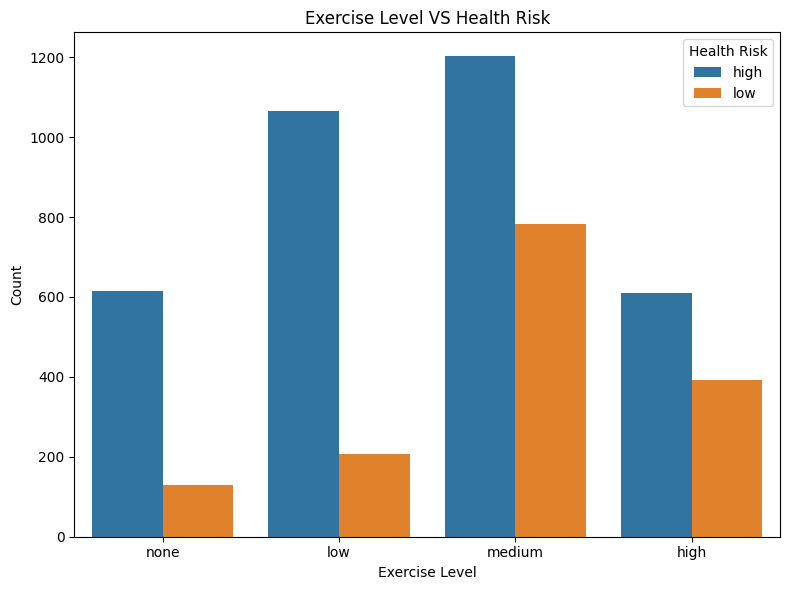

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df, 
              x='exercise', 
              hue='health_risk',
             order=['none','low','medium','high'])
plt.xlabel('Exercise Level')
plt.ylabel('Count')
plt.legend(title='Health Risk')
plt.title('Exercise Level VS Health Risk')
plt.tight_layout()
plt.show()

### Visualization of Individuals by Health Risk and Smoking Status

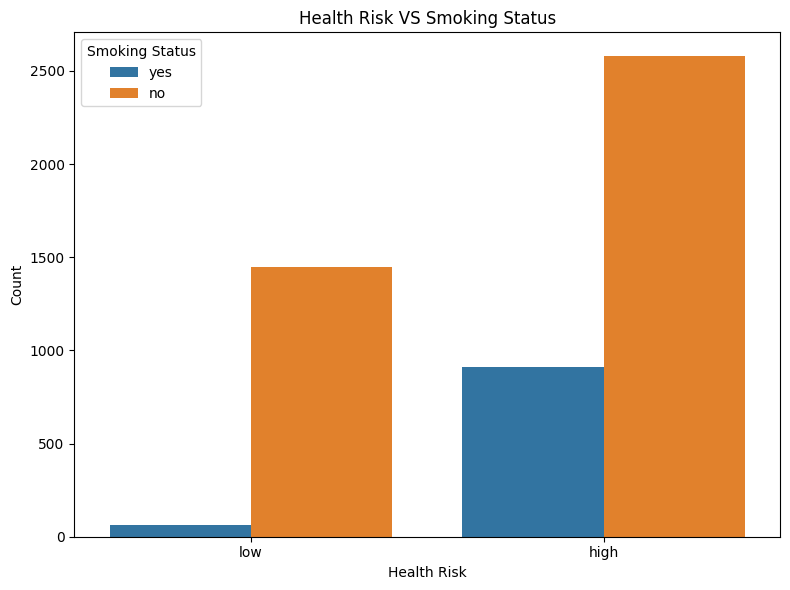

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df, 
              x='health_risk',
              hue='smoking',
             order=['low','high'])
plt.legend(title='Smoking Status')
plt.xlabel('Health Risk')
plt.ylabel('Count')
plt.title('Health Risk VS Smoking Status')
plt.tight_layout()
plt.show()

### Visualization of Individuals by Health Risk and Alcohol Status

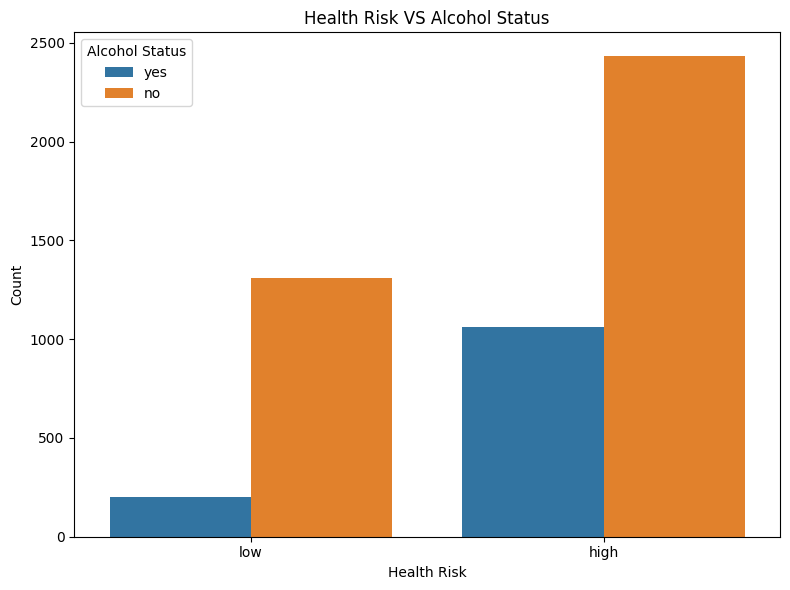

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=Health_df, 
              x='health_risk',
              hue='alcohol',
             order=['low','high'])
plt.xlabel('Health Risk')
plt.ylabel('Count')
plt.legend(title='Alcohol Status')
plt.title('Health Risk VS Alcohol Status')
plt.tight_layout()
plt.show()

### Visualization of Individuals by Health Risk Across Numerical Feature

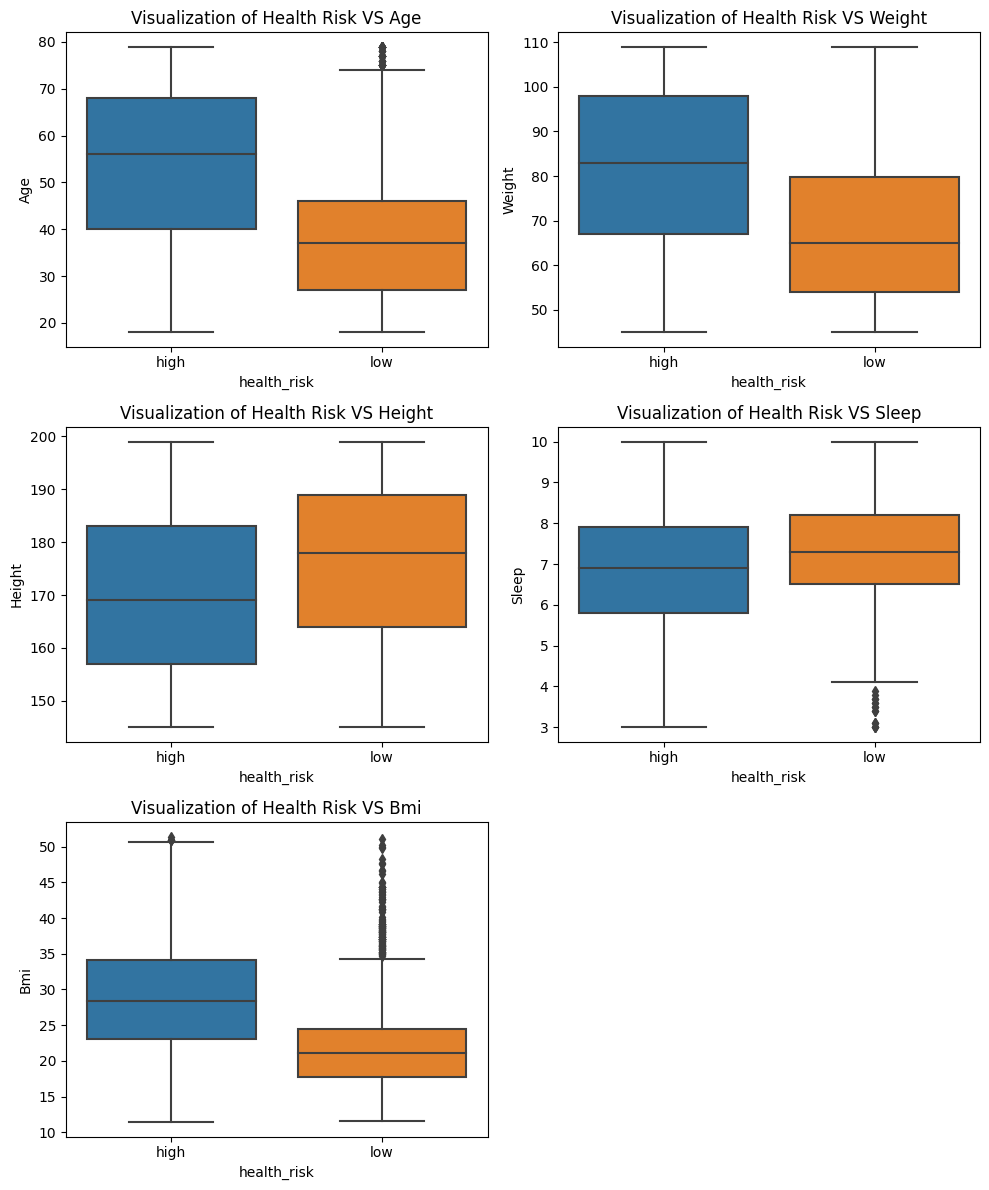

In [23]:
num_cols=['age','weight', 'height','sleep', 'bmi']
fig,axes=plt.subplots(3,2, figsize=(10,12))
axes=axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=Health_df,x='health_risk', y=col, ax=axes[i])
    axes[i].set_title(f'Visualization of Health Risk VS {col.capitalize()}')
    axes[i].set_ylabel(col.capitalize())

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Heatmap of Numerical Feature

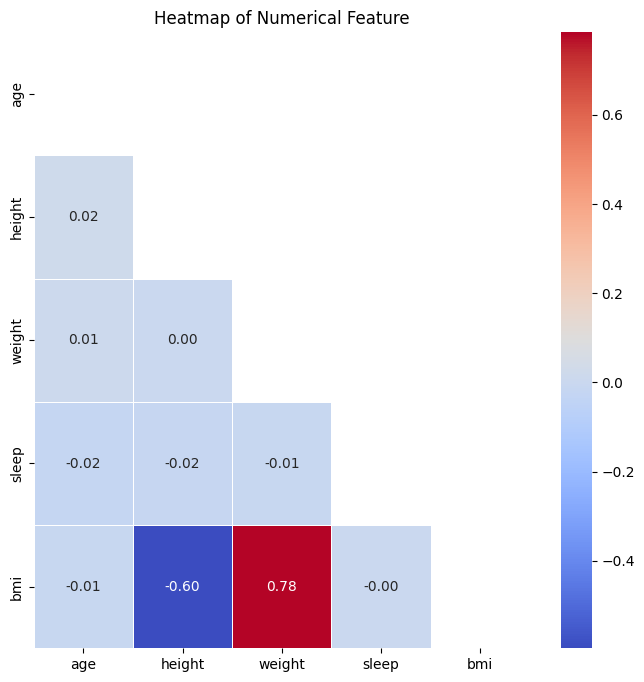

In [24]:
num_columns=Health_df[['age','height','weight','sleep','bmi']]
corr_num=num_columns.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(8,8))
sns.heatmap(corr_num,annot=True, cmap='coolwarm',linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Numerical Feature')
plt.show()             

# Preprocessing

## Encode

In [25]:
cols_to_encode=['exercise','sugar_intake','smoking','alcohol','married','profession']
encoder=OneHotEncoder(drop='first',sparse=False, dtype=int, )
encoded_data=encoder.fit_transform(Health_df[cols_to_encode])

encode_cols=encoder.get_feature_names_out(cols_to_encode)
encode_df=pd.DataFrame(encoded_data, columns=encode_cols)

Health_df=pd.concat([Health_df.drop(columns=cols_to_encode).reset_index(drop=True),
                    encode_df.reset_index(drop=True)],
                   axis=1)

In [26]:
Health_risk_encode={
    'low':0,
    'high':1
}
Health_df['health_risk']=Health_df['health_risk'].map(Health_risk_encode)

## Split Traing Data and Test Data

In [27]:
X=Health_df.drop(columns='health_risk', axis=1)
y=Health_df['health_risk']

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)
print(f"Training Data Shape = X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"Test Data Shape = X_test;{X_test.shape}, y_test:{y_test.shape} ")

Training Data Shape = X_train:(4000, 20), y_train:(4000,)
Test Data Shape = X_test;(1000, 20), y_test:(1000,) 


### Balance Target Variable

In [29]:
train_df=X_train.copy()
train_df['health_risk']=y_train

health_majority=train_df[train_df['health_risk']==1]
health_minority=train_df[train_df['health_risk']==0]

health_oversample_minority=resample(
    health_minority,
    replace=True,
    n_samples=len(health_majority),
    random_state=42
)
train_balance=pd.concat([health_majority, health_oversample_minority])
train_balance=train_balance.sample(frac=1, random_state=42).reset_index(drop=True)

X_train=train_balance.drop(columns='health_risk',axis=1)
y_train=train_balance['health_risk']
y_train.value_counts()

health_risk
1    2782
0    2782
Name: count, dtype: int64

# Modeling

## Logistic Regression

### Score Metric

In [30]:
LG=LogisticRegression(max_iter=5000, random_state=42).fit(X_train, y_train)
eval_train_lg=LG.predict(X_train)
eval_test_lg=LG.predict(X_test)

acc_lg=accuracy_score(y_test, eval_test_lg)
precision_lg=precision_score(y_test, eval_test_lg)
recall_lg=recall_score(y_test, eval_test_lg)
f1_lg=f1_score(y_test, eval_test_lg)

In [31]:
Metrics_df=({
    'Accuracy':[acc_lg],
    'Preciion':[precision_lg],
    'Recall':[recall_lg],
    'F1':[f1_lg]
})
Metrics_df=pd.DataFrame(Metrics_df, index=['Logistic Regression'])
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.93617,0.870056,0.901903


### Classification Report

In [32]:
print('Training Data')
print(classification_report(eval_train_lg,y_train))
print('='*50)
print('Test Data')
print(classification_report(eval_test_lg, y_test))

Training Data
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2863
           1       0.87      0.90      0.89      2701

    accuracy                           0.89      5564
   macro avg       0.89      0.89      0.89      5564
weighted avg       0.89      0.89      0.89      5564

Test Data
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       342
           1       0.87      0.94      0.90       658

    accuracy                           0.87      1000
   macro avg       0.86      0.83      0.85      1000
weighted avg       0.87      0.87      0.86      1000



### Confusion Matrix

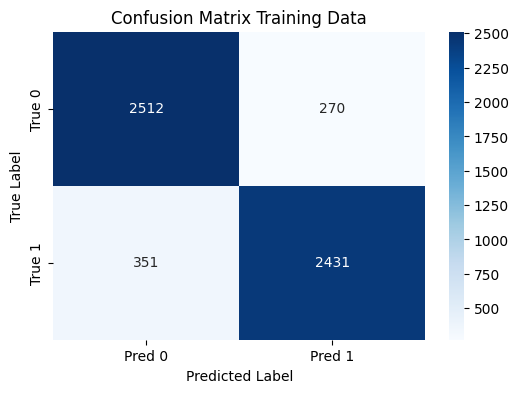

In [33]:
cm_train_lg=confusion_matrix(y_train, eval_train_lg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_lg, annot=True, fmt='d', cmap='Blues',xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

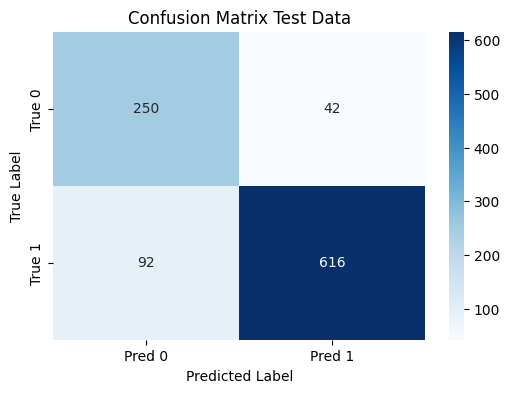

In [34]:
cm_test_lg=confusion_matrix(y_test, eval_test_lg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Random Forest

### Score Metric

In [35]:
RF=RandomForestClassifier().fit(X_train, y_train)

eval_train_rf=RF.predict(X_train)
eval_test_rf=RF.predict(X_test)

acc_rf=accuracy_score(y_test, eval_test_rf)
precision_rf=precision_score(y_test, eval_test_rf)
recall_rf=recall_score(y_test, eval_test_rf)
f1_rf=f1_score(y_test, eval_test_rf)

In [36]:
Metrics_df.loc['Random Forest']=[acc_rf, precision_rf, recall_rf, f1_rf]
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.936170,0.870056,0.901903
Random Forest,0.979,0.991416,0.978814,0.985075


### Classfication Report

In [37]:
print("Training Data")
print(classification_report(y_train, eval_train_rf))
print("="*50)
print("Test Data")
print(classification_report(y_test, eval_test_rf))


Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2782
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5564
   macro avg       1.00      1.00      1.00      5564
weighted avg       1.00      1.00      1.00      5564

Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       292
           1       0.99      0.98      0.99       708

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



### Confusion Matrix

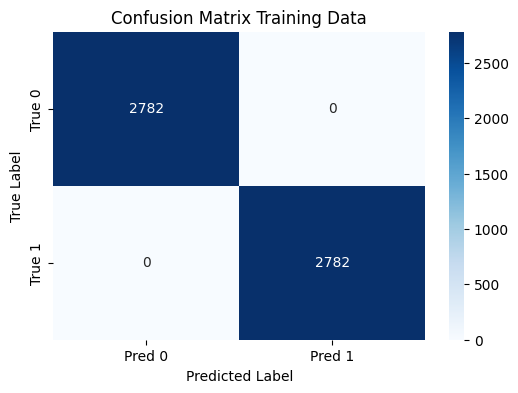

In [38]:
cm_train_rf=confusion_matrix(y_train, eval_train_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

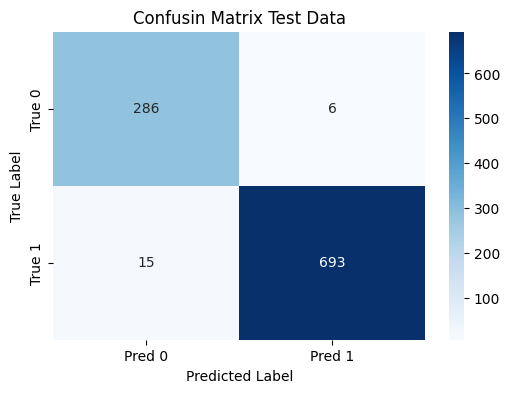

In [39]:
cm_test_rf=confusion_matrix(y_test, eval_test_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusin Matrix Test Data')
plt.show()

## Decision Tree

### Score Metric

In [40]:
DT=DecisionTreeClassifier().fit(X_train, y_train)

eval_train_dt=DT.predict(X_train)
eval_test_dt=DT.predict(X_test)

acc_dt=accuracy_score(y_test, eval_test_dt)
precision_dt=precision_score(y_test, eval_test_dt)
recall_dt=recall_score(y_test, eval_test_dt)
f1_dt=f1_score(y_test, eval_test_dt)


In [41]:
Metrics_df.loc['Decision Tree']=[acc_dt, precision_dt, recall_dt, f1_dt]
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.936170,0.870056,0.901903
Random Forest,0.979,0.991416,0.978814,0.985075
Decision Tree,0.980,0.984507,0.987288,0.985896


### Classification Report

In [42]:
print('Training Data')
print(classification_report(y_train, eval_train_dt))
print("="*50)
print("Test Data")
print(classification_report(y_test, eval_test_dt))

Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2782
           1       1.00      1.00      1.00      2782

    accuracy                           1.00      5564
   macro avg       1.00      1.00      1.00      5564
weighted avg       1.00      1.00      1.00      5564

Test Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       292
           1       0.98      0.99      0.99       708

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



### Confusion Matrix

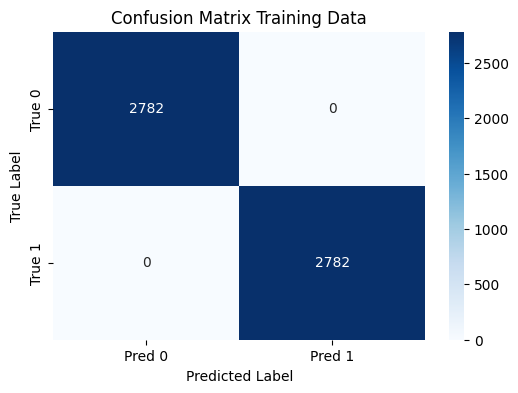

In [43]:
cm_train_dt=confusion_matrix(y_train, eval_train_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

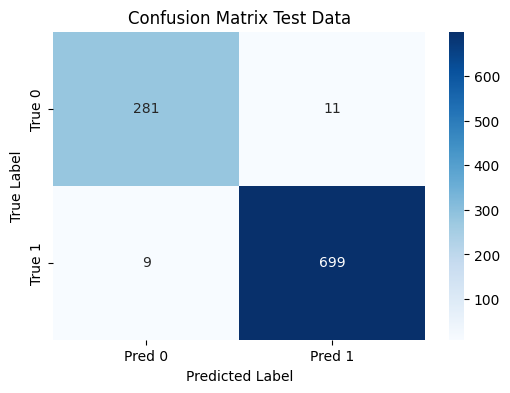

In [44]:
cm_test_dt=confusion_matrix(y_test, eval_test_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## SVM

### Score Metric

In [45]:
SVM=SVC().fit(X_train, y_train)
eval_train_svm=SVM.predict(X_train)
eval_test_svm=SVM.predict(X_test)

acc_svm=accuracy_score(y_test, eval_test_svm)
precision_svm=precision_score(y_test, eval_test_svm)
recall_svm=recall_score(y_test, eval_test_svm)
f1_svm=f1_score(y_test, eval_test_svm)

In [46]:
Metrics_df.loc['SVM']=[acc_svm, precision_svm, recall_svm, f1_svm]
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.936170,0.870056,0.901903
Random Forest,0.979,0.991416,0.978814,0.985075
Decision Tree,0.980,0.984507,0.987288,0.985896
SVM,0.756,0.871795,0.768362,0.816817


### Classification Report

In [47]:
print('Training Data')
print(classification_report(y_train, eval_train_svm))
print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_svm))

Training Data
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2782
           1       0.76      0.78      0.77      2782

    accuracy                           0.77      5564
   macro avg       0.77      0.77      0.77      5564
weighted avg       0.77      0.77      0.77      5564

Test Data
              precision    recall  f1-score   support

           0       0.56      0.73      0.63       292
           1       0.87      0.77      0.82       708

    accuracy                           0.76      1000
   macro avg       0.72      0.75      0.73      1000
weighted avg       0.78      0.76      0.76      1000



### Confusion Matrix

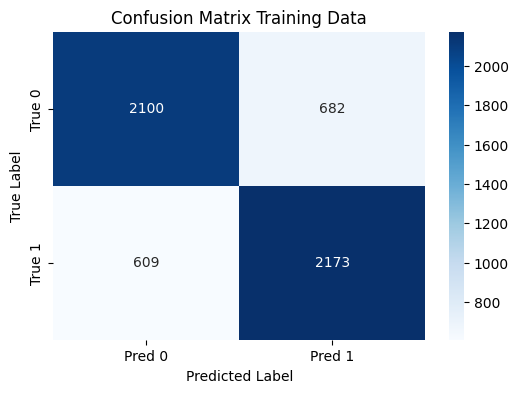

In [48]:
cm_train_svm=confusion_matrix(y_train, eval_train_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

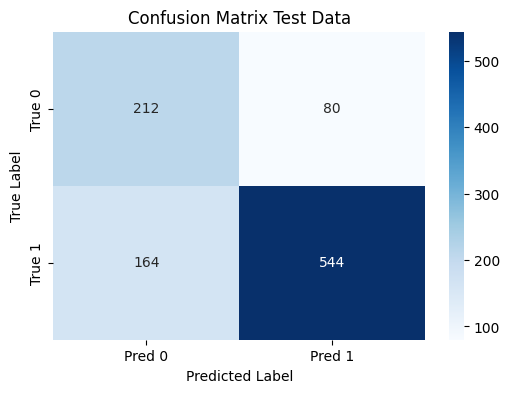

In [49]:
cm_test_svm=confusion_matrix(y_test, eval_test_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Gradient Boosting 

### Score Metric

In [50]:
GBC=GradientBoostingClassifier().fit(X_train, y_train)
eval_train_gbc=GBC.predict(X_train)
eval_test_gbc=GBC.predict(X_test)

acc_gbc=accuracy_score(y_test, eval_test_gbc)
precision_gbc=precision_score(y_test, eval_test_gbc)
recall_gbc=recall_score(y_test, eval_test_gbc)
f1_gbc=f1_score(y_test, eval_test_gbc)

In [51]:
Metrics_df.loc['Gradient Boosting']=[acc_gbc, precision_gbc, recall_gbc, f1_gbc]
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.936170,0.870056,0.901903
Random Forest,0.979,0.991416,0.978814,0.985075
Decision Tree,0.980,0.984507,0.987288,0.985896
SVM,0.756,0.871795,0.768362,0.816817
Gradient Boosting,0.978,0.995665,0.973164,0.984286


### Classification Report

In [52]:
print('Training Data')
print(classification_report(y_train, eval_train_gbc))
print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_gbc))

Training Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2782
           1       1.00      0.98      0.99      2782

    accuracy                           0.99      5564
   macro avg       0.99      0.99      0.99      5564
weighted avg       0.99      0.99      0.99      5564

Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       292
           1       1.00      0.97      0.98       708

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



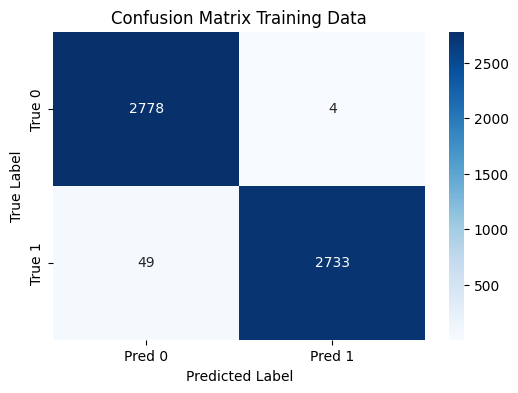

In [53]:
cm_train_gbc=confusion_matrix(y_train, eval_train_gbc)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

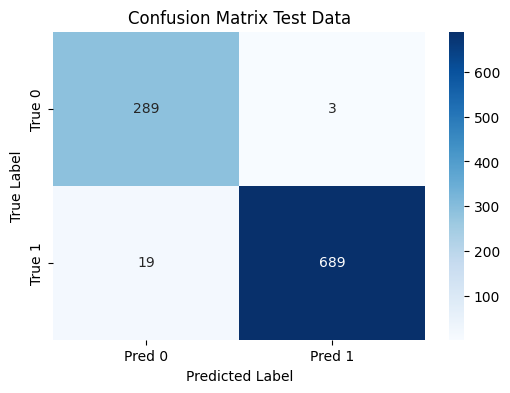

In [54]:
cm_test_gbc=confusion_matrix(y_test, eval_test_gbc)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## XGBoost

### Score Metric

In [55]:
XGB=xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
).fit(X_train, y_train)

eval_train_xgb=XGB.predict(X_train)
eval_test_xgb=XGB.predict(X_test)

acc_xgb=accuracy_score(y_test, eval_test_xgb)
precision_xgb=precision_score(y_test, eval_test_xgb)
recall_xgb=recall_score(y_test, eval_test_xgb)
f1_xgb=f1_score(y_test, eval_test_xgb)

In [56]:
Metrics_df.loc['XGB Classifier']=[acc_xgb, precision_xgb, recall_xgb, f1_xgb]
Metrics_df

,Accuracy,Preciion,Recall,F1
Logistic Regression,0.866,0.936170,0.870056,0.901903
Random Forest,0.979,0.991416,0.978814,0.985075
Decision Tree,0.980,0.984507,0.987288,0.985896
SVM,0.756,0.871795,0.768362,0.816817
Gradient Boosting,0.978,0.995665,0.973164,0.984286
XGB Classifier,0.977,0.994228,0.973164,0.983583


### Classification Report

In [57]:
print('Training Data')
print(classification_report(y_train, eval_train_xgb))
print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_xgb))

Training Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2782
           1       1.00      0.98      0.99      2782

    accuracy                           0.99      5564
   macro avg       0.99      0.99      0.99      5564
weighted avg       0.99      0.99      0.99      5564

Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       292
           1       0.99      0.97      0.98       708

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



### Confusion Matrix

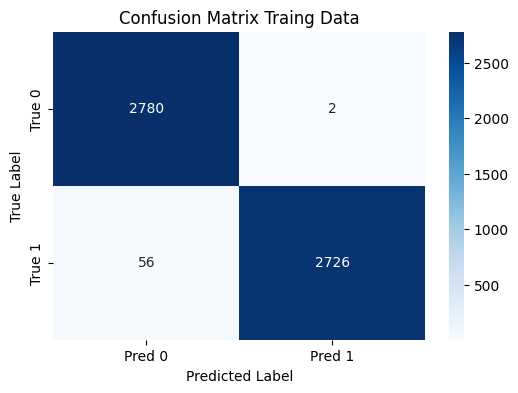

In [58]:
cm_train_xgb=confusion_matrix(y_train, eval_train_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'],yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Traing Data')
plt.show()

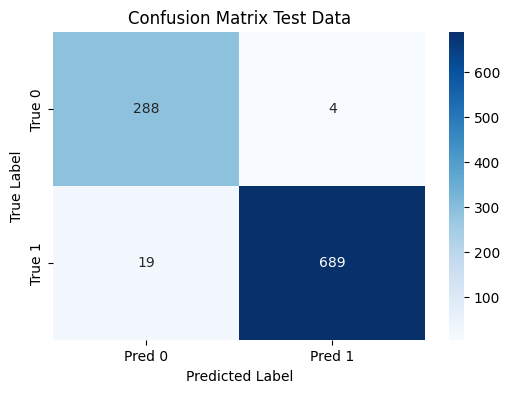

In [59]:
cm_test_xgb=confusion_matrix(y_test, eval_test_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

### Conclusion
From the modeling results, all models have an F1 Score of more than 0.8. However, the algorithm with the highest metric is decision tree, while SVM has the lowest metric. This shows that SVM has the lowest recall, indicating that SVM accurately identifies positive cases (true positives) from all actual positive samples in the dataset